In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from keras.optimizers import SGD, Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
import random

In [3]:
def train_predict(X_train, y_train, X_test, y_test):
    # Data preprocessing
    y_train_ohe = to_categorical(y_train, num_classes=10, dtype='int')
    y_test_ohe = to_categorical(y_test, num_classes=10, dtype='int')

    # Define CNN model
    def cnn_model():
        model = Sequential()
        model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
        model.add(MaxPool2D(pool_size=(2, 2), strides=2))
        model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
        model.add(MaxPool2D(pool_size=(2, 2), strides=2))
        model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='valid'))
        model.add(MaxPool2D(pool_size=(2, 2), strides=2))
        model.add(Flatten())
        model.add(Dense(64, activation="relu"))
        model.add(Dense(128, activation="relu"))
        model.add(Dense(10, activation="softmax"))
        model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
        return model

    model = cnn_model()
    model.fit(X_train, y_train_ohe, epochs=20, validation_data=(X_test, y_test_ohe))

    # Make predictions
    y_pred_probs = model.predict(X_test, verbose=1)
    y_pred = y_pred_probs.argmax(axis=-1)

    return y_pred

if __name__ == "__main__":
    # Load CIFAR-10 data
    (X_train, y_train), (X_test, y_test) = cifar10.load_data()

    # Train and predict
    predictions = train_predict(X_train, y_train, X_test, y_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, predictions)
    print("Accuracy:", accuracy)

Epoch 1/20
1563/1563 [==============================] - 103s 66ms/step - loss: 1.6915 - accuracy: 0.4017 - val_loss: 1.5199 - val_accuracy: 0.4684
Epoch 2/20
1563/1563 [==============================] - 103s 66ms/step - loss: 1.3000 - accuracy: 0.5394 - val_loss: 1.2433 - val_accuracy: 0.5563
Epoch 3/20
1563/1563 [==============================] - 106s 68ms/step - loss: 1.1559 - accuracy: 0.5959 - val_loss: 1.1501 - val_accuracy: 0.6030
Epoch 4/20
1563/1563 [==============================] - 101s 65ms/step - loss: 1.0530 - accuracy: 0.6342 - val_loss: 1.0789 - val_accuracy: 0.6232
Epoch 5/20
1563/1563 [==============================] - 102s 65ms/step - loss: 0.9694 - accuracy: 0.6653 - val_loss: 1.1461 - val_accuracy: 0.6068
Epoch 6/20
1563/1563 [==============================] - 99s 63ms/step - loss: 0.9041 - accuracy: 0.6855 - val_loss: 1.0652 - val_accuracy: 0.6307
Epoch 7/20
1563/1563 [==============================] - 100s 64ms/step - loss: 0.8443 - accuracy: 0.7072 - val_loss: 1.

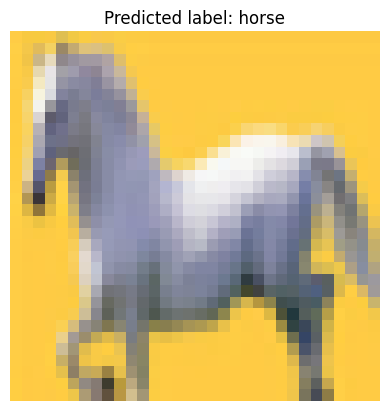

In [32]:
def show_image_prediction(X_test, y_pred, index):
    # Get the image at the specified index
    image = X_test[index]
    
    # Get the predicted label at the specified index
    prediction = y_pred[index]

    # Define class labels
    class_labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

    # Get the class label for the prediction
    class_label = class_labels[prediction]

    # Display the image and print the prediction
    plt.imshow(image)
    plt.title(f"Predicted label: {class_label}")
    plt.axis("off")
    plt.show()

# Choose a random index from the test dataset
index = random.randint(1,1000)

# Display the image and its prediction
show_image_prediction(X_test, predictions, index)
